# Install the Python libraries


In [ ]:
#pip install opencv-python

In [ ]:
#pip install matplotlib

In [ ]:
#pip install numpy

In [ ]:
#pip install gTTS

# Importing the libraries

In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from gtts import gTTS

In [5]:
import os

In [6]:
cfg_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'

In [7]:
frozen_model = 'frozen_inference_graph.pb'

In [8]:
model = cv2.dnn_DetectionModel(frozen_model,cfg_file)

In [9]:
classLables = []
file_name = 'label.txt'
with open(file_name,'rt') as ftp:
    classLables = ftp.read().rstrip('\n').rsplit('\n')
    

In [10]:
print(classLables)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [11]:
a = classLables

In [12]:
a[32]

'sports ball'

In [13]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

<dnn_Model 0000023FA3F42D10>

# Read an Image

In [14]:
img = cv2.imread('car-man.jpg')

In [15]:
#img = cv2.imread('market.jpg')

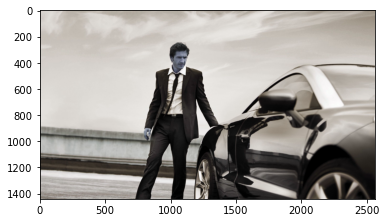

In [16]:
plt.imshow(img)

In [17]:
ClassIndex, confidence , bbox = model.detect(img,confThreshold=0.5)

In [18]:
#ClassIndex, confidence , bbox = model.detect(img1,confThreshold=0.5)

In [19]:
print(ClassIndex)

[3 1]


In [20]:
 print(confidence)

[0.70252407 0.5343487 ]


In [21]:
print(bbox)

[[1223  391 1328 1044]
 [ 720  243  670 1197]]


In [22]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf , boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255, 100, 0), 2)
    cv2.putText(img,classLables[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness =3 )
    cv2.putText(img,str((round(conf*100))),(boxes[0]+300,boxes[1]+40), font,fontScale=font_scale,color=(0,255,0), thickness =3 )

In [23]:
x= ClassIndex.tolist()

In [24]:
y = []
y1 = []
temp = []
for i in range(0,len(x)):
    y.append(a[(int(x[i]-1))])
    print(y)

['car']
['car', 'person']


In [25]:
print(y)

['car', 'person']


In [26]:
str2=''.join(y)
str1 = "There is"
str3 = "present in picture"
str = str1+ " " +str2+" "+str3

In [27]:
type(y)

list

In [28]:
language = 'en'


In [29]:
audio_output = gTTS(text=str, lang=language, slow=True)

In [30]:
audio_output.save("test1.mp3")

In [31]:
os.system('start test1.mp3')

0

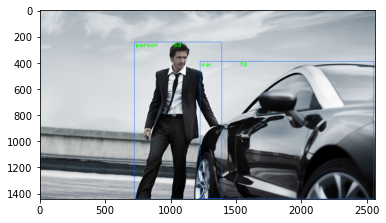

In [32]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [35]:
print(cv2.dnn_DetectionModel)

<class 'cv2.dnn_DetectionModel'>


# Real Time Demo

In [ ]:
cap = cv2.VideoCapture("videoplayback.mp4")

#cap.set(3,640)
#cap.set(4,480)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("cannot open the video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    
    ClassIndex, confidence , bbox = model.detect(frame,confThreshold=0.5)
    
    print(ClassIndex , confidence)
    if (len(ClassIndex)!=0):
        for ClassInd, conf , boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame,boxes,(255, 100, 0), 2)
                cv2.putText(frame,classLables[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness =3 )
                cv2.putText(frame,str(round(conf*100)),(boxes[0]+300,boxes[1]+40), font,fontScale=font_scale,color=(0,255,0), thickness =3 )
      
    cv2.imshow("Object Detection Model",frame)
    
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllwindows()